In [1]:
import os

import pandas as pd
import numpy as np
import random
import sklearn.preprocessing as preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (GradientBoostingClassifier, GradientBoostingRegressor,RandomForestClassifier, RandomForestRegressor)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = pd.concat([train,test])

#Data Info & missing

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


2 #Data observation

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5,1,'train feature corr')

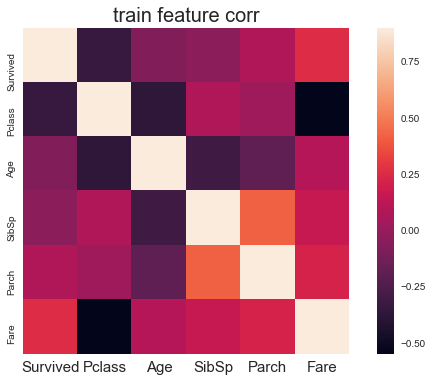

In [7]:
#Cov
sns.set(context="paper", font="monospace")
sns.set(style="white")
f, ax = plt.subplots(figsize=(10,6))
train_corr = train.drop('PassengerId',axis=1).corr()
sns.heatmap(train_corr, ax=ax, vmax=.9, square=True)
ax.set_xticklabels(train_corr.index, size=15)
ax.set_yticklabels(train_corr.columns[::1], size=10)
ax.set_title('train feature corr', fontsize=20)

In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


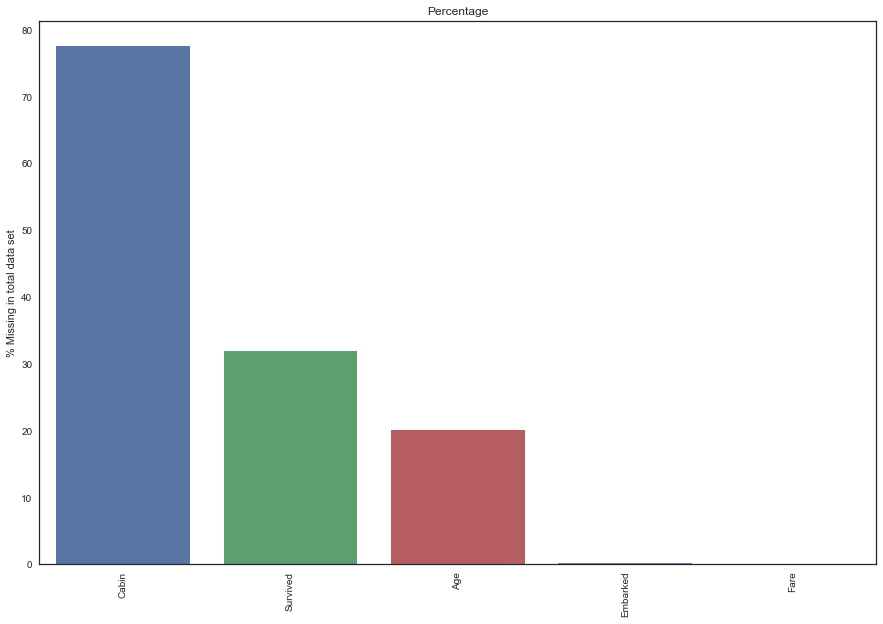

In [17]:
total_null = (combine.isnull().sum()/len(combine))*100
total_null = total_null.drop(total_null[total_null == 0].index).sort_values(ascending = False)

f,ax = plt.subplots(figsize = (15,10))
plt.xticks(rotation  = '90')
sns.barplot(x = total_null.index, y = total_null)
ax.set(title = 'Percentage', ylabel = '% Missing in total data set')
ax = plt.gca()
plt.show()


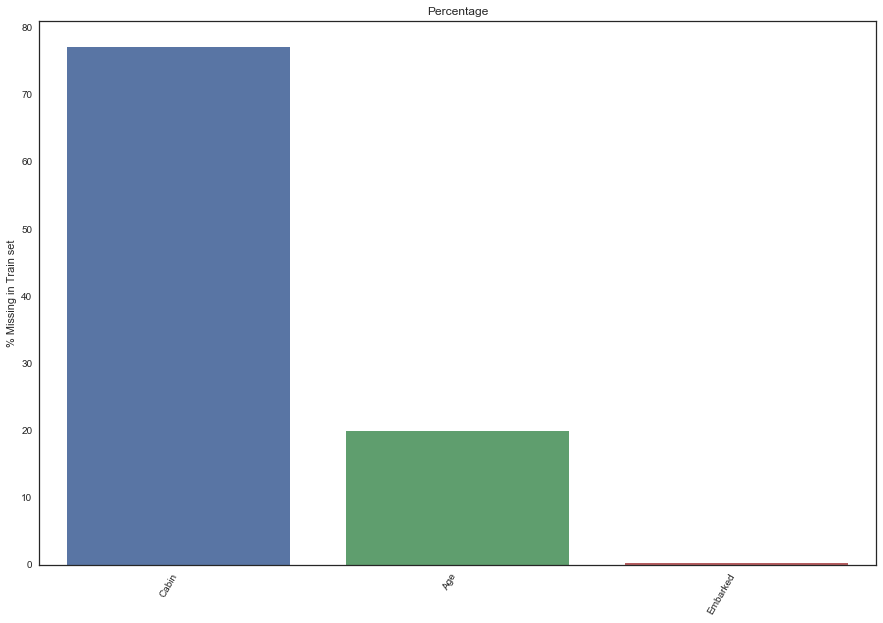

In [9]:
train_null = (train.isnull().sum() / len(train)) * 100
train_null = train_null.drop(train_null[train_null == 0].index).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(15, 10))
plt.xticks(rotation='90')
sns.barplot(x=train_null.index, y=train_null)
ax.set(title='Percentage', ylabel='% Missing in Train set')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')
plt.show()

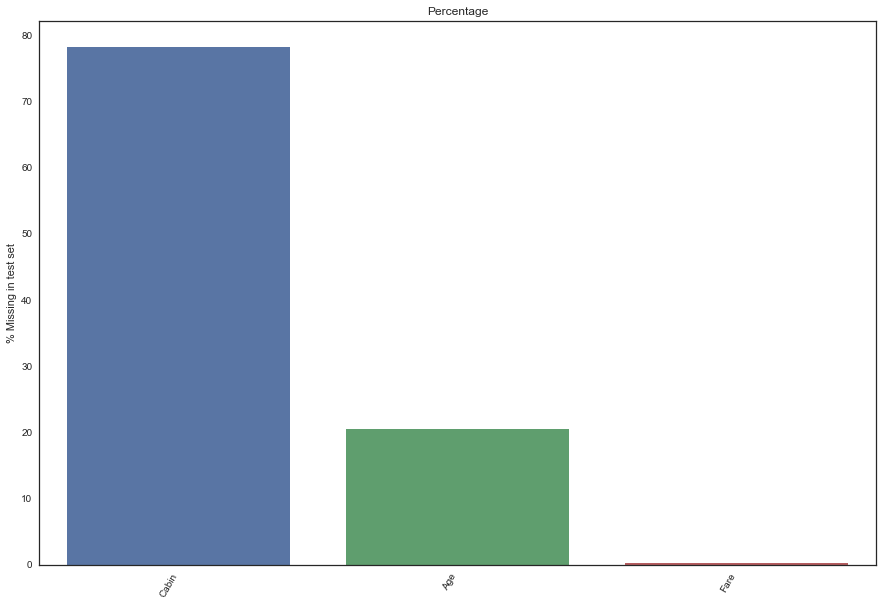

In [18]:
test_null = (test.isnull().sum() / len(test)) * 100
test_null = test_null.drop(test_null[test_null == 0].index).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(15, 10))
plt.xticks(rotation='90')
sns.barplot(x=test_null.index, y=test_null)
ax.set(title='Percentage', ylabel='% Missing in test set')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')
plt.show()

2.1 Age

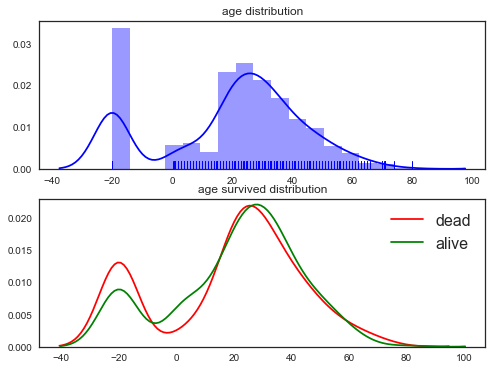

In [19]:
from scipy import stats
fig, axes = plt.subplots(2,1,figsize=(8,6))
sns.set_style('white')
sns.distplot(train.Age.fillna(-20), rug=True, color='b', ax=axes[0])
ax0 = axes[0]
ax0.set_title('age distribution')
ax0.set_xlabel('')

ax1 = axes[1]
ax1.set_title('age survived distribution')
k1 = sns.distplot(train[train.Survived==0].Age.fillna(-20), hist=False, color='r', ax=ax1, label='dead')
k2 = sns.distplot(train[train.Survived==1].Age.fillna(-20), hist=False, color='g', ax=ax1, label='alive')
ax1.set_xlabel('')

ax1.legend(fontsize=16)

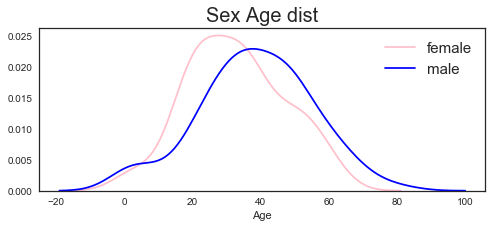

In [20]:
f, ax = plt.subplots(figsize=(8,3))
ax.set_title('Sex Age dist', size=20)
sns.distplot(train[train.Sex=='female'].dropna().Age, hist=False, color='pink', label='female')
sns.distplot(train[train.Sex=='male'].dropna().Age, hist=False, color='blue', label='male')
ax.legend(fontsize=15)

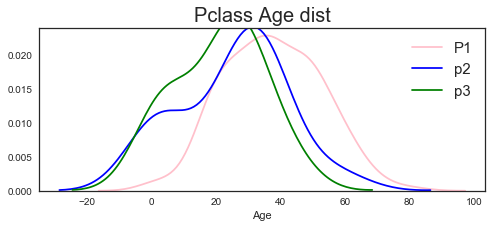

In [21]:
f, ax = plt.subplots(figsize=(8,3))
ax.set_title('Pclass Age dist', size=20)
sns.distplot(train[train.Pclass==1].dropna().Age, hist=False, color='pink', label='P1')
sns.distplot(train[train.Pclass==2].dropna().Age, hist=False, color='blue', label='p2')
sns.distplot(train[train.Pclass==3].dropna().Age, hist=False, color='g', label='p3')
ax.legend(fontsize=15)

#2.2 PClass

Text(0.5,1,'Pclass Survived count')

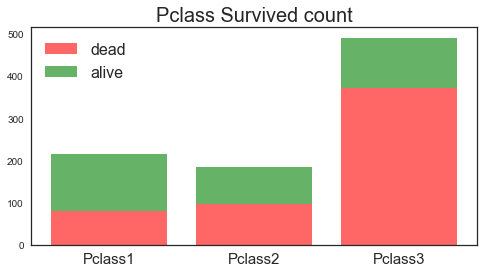

In [22]:
y_dead = train[train.Survived==0].groupby('Pclass')['Survived'].count()
y_alive = train[train.Survived==1].groupby('Pclass')['Survived'].count()
pos = [1, 2, 3]
ax = plt.figure(figsize=(8,4)).add_subplot(111)
ax.bar(pos, y_dead, color='r', alpha=0.6, label='dead')
ax.bar(pos, y_alive, color='g', bottom=y_dead, alpha=0.6, label='alive')
ax.legend(fontsize=16, loc='best')
ax.set_xticks(pos)
ax.set_xticklabels(['Pclass%d'%(i) for i in range(1,4)], size=15)
ax.set_title('Pclass Survived count', size=20)

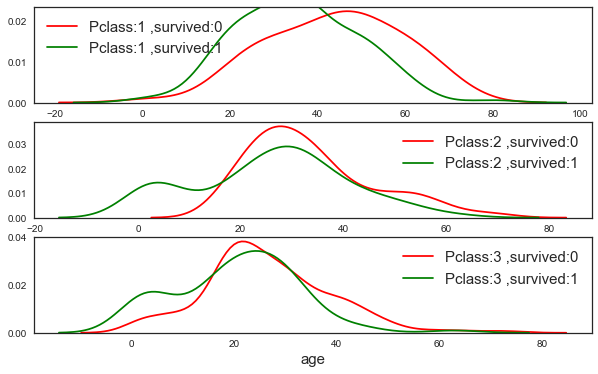

In [25]:
pos = range(0,6)
age_list = []
for Pclass_ in range(1,4):
    for Survived_ in range(0,2):
        age_list.append(train[(train.Pclass == Pclass_)&(train.Survived == Survived_)].Age.values)

fig, axes = plt.subplots(3,1,figsize=(10,6))

i_Pclass = 1
for ax in axes:
    sns.distplot(age_list[i_Pclass*2-2], hist=False, ax=ax, label='Pclass:%d ,survived:0'%(i_Pclass), color='r')
    sns.distplot(age_list[i_Pclass*2-1], hist=False, ax=ax, label='Pclass:%d ,survived:1'%(i_Pclass), color='g')
    i_Pclass += 1
    ax.set_xlabel('age', size=15)
    ax.legend(fontsize=15)

#2.3 Sex

In [16]:
print(train.Sex.value_counts())
print('********************************')
print (train.groupby('Sex')['Survived'].mean())

male      577
female    314
Name: Sex, dtype: int64
********************************
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


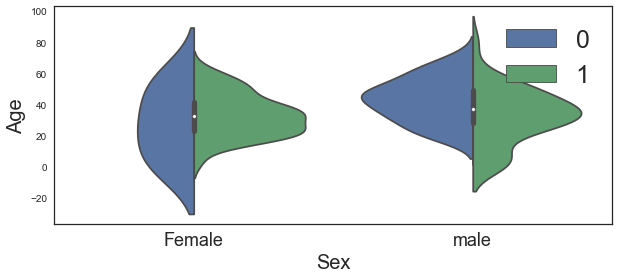

In [17]:
ax = plt.figure(figsize=(10,4)).add_subplot(111)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train.dropna(), split=True)
ax.set_xlabel('Sex',size=20)
ax.set_xticklabels(['Female','male'], size=18)
ax.set_ylabel('Age',size=20)
ax.legend(fontsize=25,loc='best')

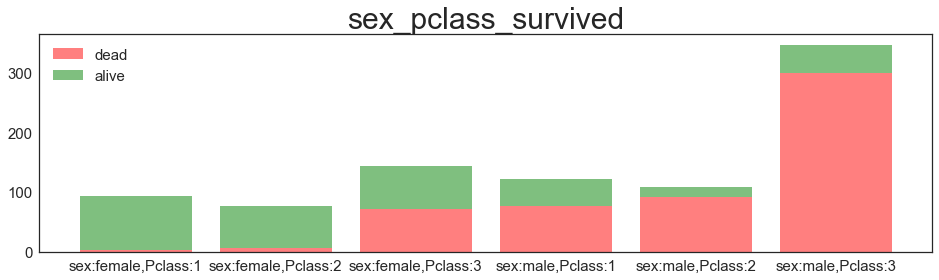

In [18]:
label = []
for sex_i in ['female','male']:
    for pclass_i in range(1,4):
        label.append('sex:%s,Pclass:%d'%(sex_i, pclass_i))
        
pos = range(6)
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.bar(pos, 
        train[train['Survived']==0].groupby(['Sex','Pclass'])['Survived'].count().values, 
        color='r', 
        alpha=0.5, 
        align='center',
        tick_label=label, 
        label='dead')
ax.bar(pos, 
        train[train['Survived']==1].groupby(['Sex','Pclass'])['Survived'].count().values, 
        bottom=train[train['Survived']==0].groupby(['Sex','Pclass'])['Survived'].count().values,
        color='g',
        alpha=0.5,
        align='center',
        tick_label=label, 
        label='alive')
ax.tick_params(labelsize=15)
ax.set_title('sex_pclass_survived', size=30)
ax.legend(fontsize=15,loc='best')

#2.4 Fare

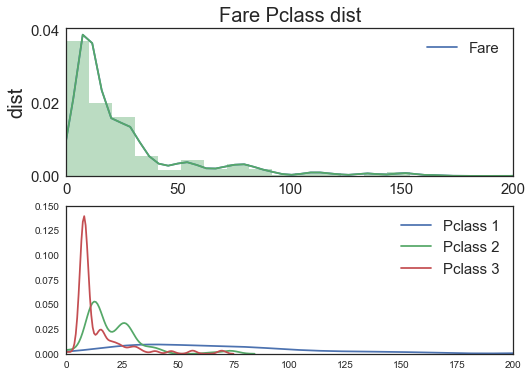

In [19]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot2grid((2,2), (0,0), colspan=2)

ax.tick_params(labelsize=15)
ax.set_title('Fare dist', size=20)
ax.set_ylabel('dist', size=20)
sns.kdeplot(train.Fare, ax=ax)
sns.distplot(train.Fare, ax=ax)
ax.legend(fontsize=15)
pos = range(0,400,50)
ax.set_xticks(pos)
ax.set_xlim([0, 200])
ax.set_xlabel('')

ax1 = plt.subplot2grid((2,2), (1,0), colspan=2)
ax.set_title('Fare Pclass dist', size=20)
for i in range(1,4):
    sns.kdeplot(train[train.Pclass==i].Fare, ax=ax1, label='Pclass %d'%(i))
ax1.set_xlim([0,200])
ax1.set_ylim([0,0.15])
ax1.legend(fontsize=15)


Text(0.5,0,'Fare')

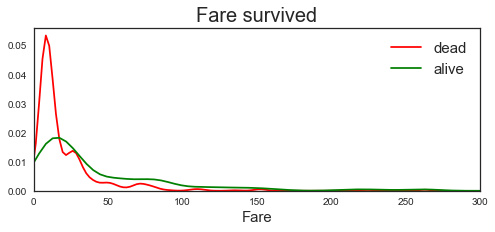

In [20]:
fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(111)
sns.kdeplot(train[train.Survived==0].Fare, ax=ax1, label='dead', color='r')
sns.kdeplot(train[train.Survived==1].Fare, ax=ax1, label='alive', color='g')
#sns.distplot(train[train.Survived==0].Fare, ax=ax1, color='r')
#sns.distplot(train[train.Survived==1].Fare, ax=ax1, color='g')
ax1.set_xlim([0,300])
ax1.legend(fontsize=15)
ax1.set_title('Fare survived', size=20)
ax1.set_xlabel('Fare', size=15)

#2.5 Sib&Parch

Text(0.5,1,'Parch')

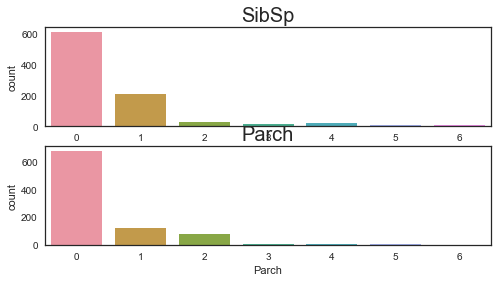

In [21]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(211)
sns.countplot(train.SibSp)
ax1.set_title('SibSp', size=20)
ax2 = fig.add_subplot(212, sharex=ax1)
sns.countplot(train.Parch)
ax2.set_title('Parch', size=20)

Text(0.5,1,'Parch+Sibsp Survived Rate')

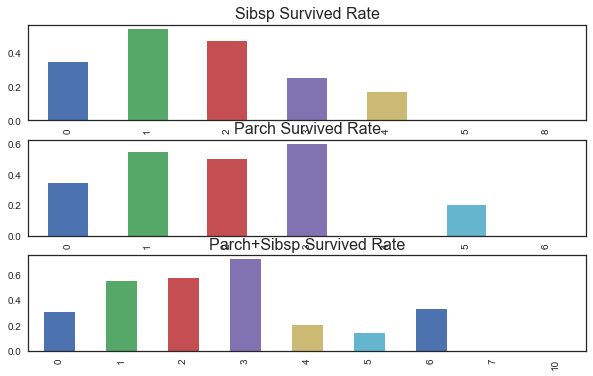

In [22]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(311)
train.groupby('SibSp')['Survived'].mean().plot(kind='bar', ax=ax1)
ax1.set_title('Sibsp Survived Rate', size=16)
ax1.set_xlabel('')

ax2 = fig.add_subplot(312)
train.groupby('Parch')['Survived'].mean().plot(kind='bar', ax=ax2)
ax2.set_title('Parch Survived Rate', size=16)
ax2.set_xlabel('')

ax3 = fig.add_subplot(313)
train.groupby(train.SibSp+train.Parch)['Survived'].mean().plot(kind='bar', ax=ax3)
ax3.set_title('Parch+Sibsp Survived Rate', size=16)

#2.6 Embarked

Text(0.5,1,'Embarked survived count')

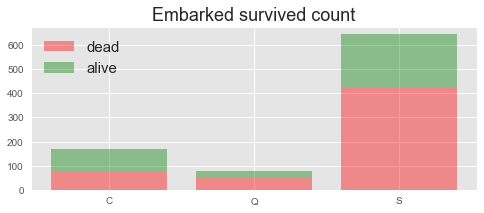

In [23]:
plt.style.use('ggplot')
ax = plt.figure(figsize=(8,3)).add_subplot(111)
pos = [1, 2, 3]
y1 = train[train.Survived==0].groupby('Embarked')['Survived'].count().sort_index().values
y2 = train[train.Survived==1].groupby('Embarked')['Survived'].count().sort_index().values
ax.bar(pos, y1, color='r', alpha=0.4, align='center', label='dead')
ax.bar(pos, y2, color='g', alpha=0.4, align='center', label='alive', bottom=y1)
ax.set_xticks(pos)
ax.set_xticklabels(['C','Q','S'])
ax.legend(fontsize=15, loc='best')
ax.set_title('Embarked survived count', size=18)

(0, 0.03)

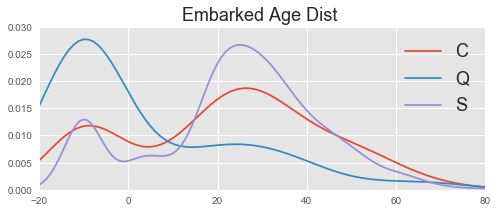

In [24]:
ax = plt.figure(figsize=(8,3)).add_subplot(111)
ax.set_xlim([-20, 80])
sns.kdeplot(train[train.Embarked=='C'].Age.fillna(-10), ax=ax, label='C')
sns.kdeplot(train[train.Embarked=='Q'].Age.fillna(-10), ax=ax, label='Q')
sns.kdeplot(train[train.Embarked=='S'].Age.fillna(-10), ax=ax, label='S')
ax.legend(fontsize=18)
ax.set_title('Embarked Age Dist ', size=18)
ax.set_ylim([0,0.03])

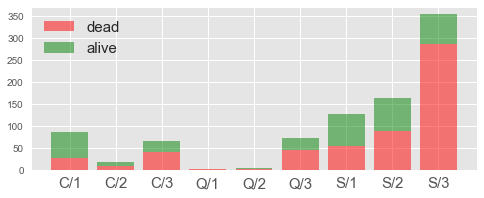

In [25]:
y1 = train[train.Survived==0].groupby(['Embarked','Pclass'])['Survived'].count().reset_index()['Survived'].values
y2 = train[train.Survived==1].groupby(['Embarked','Pclass'])['Survived'].count().reset_index()['Survived'].values

ax = plt.figure(figsize=(8,3)).add_subplot(111)
pos = range(9)
ax.bar(pos, y1, align='center', alpha=0.5, color='r', label='dead')
ax.bar(pos, y2, align='center', bottom=y1, alpha=0.5, color='g', label='alive')

ax.set_xticks(pos)
xticklabels = []
for embarked_val in ['C','Q','S']:
    for pclass_val in range(1,4):
        xticklabels.append('%s/%d'%(embarked_val,pclass_val))

ax.set_xticklabels(xticklabels,size=15)
ax.legend(fontsize=15, loc='best')

#2.7 Cabin 

In [26]:
train.Cabin.isnull().value_counts() 

True     687
False    204
Name: Cabin, dtype: int64

In [27]:
train.groupby(by=train.Cabin.isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [28]:
train[train.Cabin.apply(lambda x: len(x) if (x is not np.nan)else 0)>4].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


In [29]:
train['Cabin_Zone'] = train.Cabin.fillna('0').str.split(' ').apply(lambda x:x[0][0])
train.groupby(by = 'Cabin_Zone')['Survived'].agg(['mean','count'])

,mean,count
Cabin_Zone,,
0,0.299854,687
A,0.466667,15
B,0.744681,47
C,0.593220,59
D,0.757576,33
E,0.750000,32
F,0.615385,13
G,0.500000,4
T,0.000000,1


#2.8 Ticket

In [30]:
train.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [31]:
train.Ticket.nunique()

681

In [32]:
train[train.Ticket == '110152']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Zone
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S,B
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,S,B
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,B


#2.9

In [33]:
train.Name.apply(lambda x:x.split(',')[1].split('.')[0]).value_counts()[:5]

 Mr        517
 Miss      182
 Mrs       125
 Master     40
 Dr          7
Name: Name, dtype: int64

In [34]:
train.Name.apply(lambda x:x.split(',')[1].split('.')[1]).value_counts()[:8]

 John             9
 James            7
 Mary             6
 William          6
 William John     4
 Ivan             4
 William Henry    4
 Bertha           4
Name: Name, dtype: int64

KeyError: 'Column not found: '

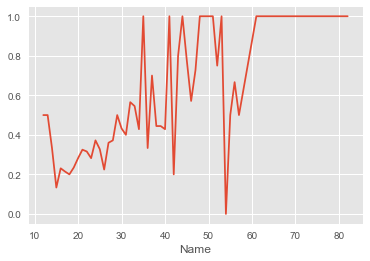

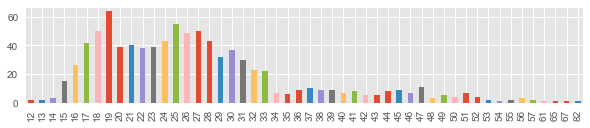

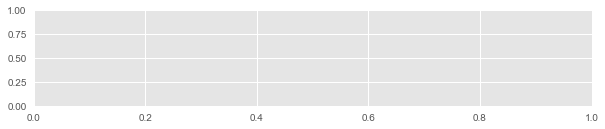

In [37]:
train.groupby(train.Name.apply(lambda x: len(x)))['Survived'].mean().plot()

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(311)
train.groupby(train.Name.apply(lambda x: len(x)))['Survived'].count().plot(kind='bar', ax=ax1)
ax1.set_xlabel('')

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(311)
test.groupby(test.Name.apply(lambda x: len(x)))[''].count().plot(kind='bar', ax=ax1)
ax1.set_xlabel('')



3 Feature engineering

In [36]:
print ('***********Train*************')
print ('test')
print (train.isnull().sum())
print ('***********test*************')
print (test.isnull().sum())

***********Train*************
test
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_Zone       0
dtype: int64
***********test*************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [37]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Zone
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


In [38]:
train[train.Cabin == 'B22']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Zone
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0,B22,S,B
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,B


In [39]:
print(train.Embarked.value_counts())
print(train[(train.Pclass==1)].Embarked.value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    127
C     85
Q      2
Name: Embarked, dtype: int64


In [40]:
train.Embarked.fillna('S', inplace = True)

In [41]:
train['Cabin'] = train['Cabin'].isnull().apply(lambda x :'Null' if x is True else 'Not Null')

In [42]:
test['Cabin'] = test['Cabin'].isnull().apply(lambda x :'Null' if x is True else 'Not Null')

In [43]:
#Discrete Age
def age_map(x):
    if x<10:
        return '10-'
    if x<60:
        return '%d-%d'%(x//5*5, x//5*5+5)
    elif x>=60:
        return '60+'
    else:
        return 'Null'
train['Age_map'] = train['Age'].apply(lambda x: age_map(x))
test['Age_map'] = test['Age'].apply(lambda x: age_map(x))

train.groupby('Age_map')['Survived'].agg(['count','mean'])

,count,mean
Age_map,,
10-,62,0.612903
10-15,16,0.437500
15-20,86,0.395349
20-25,114,0.342105
25-30,106,0.358491
30-35,95,0.421053
35-40,72,0.458333
40-45,48,0.375000
45-50,41,0.390244


In [44]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_map
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Null,S,60+


In [45]:
#Fare
test.loc[test.Fare.isnull(), 'Fare'] = \
test[(test.Pclass == 1)&(test.Embarked == 'S')].dropna().Fare.mean()

In [46]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
#Fare
fare_scale_param = scaler.fit(train['Fare'].values.reshape(-1, 1))
train.Fare = fare_scale_param.transform(train['Fare'].values.reshape(-1, 1))
test.Fare = fare_scale_param.transform(test['Fare'].values.reshape(-1, 1))

In [47]:
train_x = pd.concat([train[['SibSp','Parch','Fare']], pd.get_dummies(train[['Pclass','Sex','Cabin','Embarked','Age_map']])],axis=1)
train_y = train.Survived
test_x = pd.concat([test[['SibSp','Parch','Fare']], pd.get_dummies(test[['Pclass', 'Sex','Cabin','Embarked', 'Age_map']])],axis=1)

In [48]:
train_x.head()

,SibSp,Parch,Fare,Pclass,Sex_female,Sex_male,Cabin_Not Null,Cabin_Null,Embarked_C,Embarked_Q,...,Age_map_20-25,Age_map_25-30,Age_map_30-35,Age_map_35-40,Age_map_40-45,Age_map_45-50,Age_map_50-55,Age_map_55-60,Age_map_60+,Age_map_Null
0,1,0,-0.502445,3,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0.786845,1,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,-0.488854,3,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0.420730,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,-0.486337,3,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
#Baseline model
base_line_model = LogisticRegression()
param = {'penalty':['l1','l2'], 
        'C':[0.1, 0.5, 1.0,5.0]}
grd = GridSearchCV(estimator=base_line_model, param_grid=param, cv=5, n_jobs=3)
grd.fit(train_x, train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.5, 1.0, 5.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
grd.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

(0.7994487816366191, 0.029496353096645223)

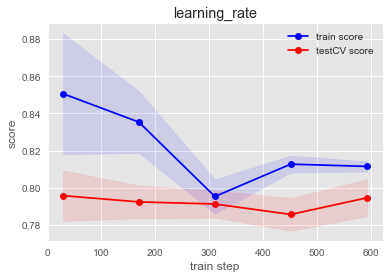

In [51]:
def plot_learning_curve(clf, title, x, y, ylim=None, cv=None, n_jobs=3, train_sizes=np.linspace(.05, 1., 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        clf, x, y, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax = plt.figure().add_subplot(111)
    ax.set_title(title)
    if ylim is not None:
        ax.ylim(*ylim)
    ax.set_xlabel(u"train step")
    ax.set_ylabel(u"score")

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                     alpha=0.1, color="b")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                     alpha=0.1, color="r")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"testCV score")

    ax.legend(loc="best")

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(grd, u"learning_rate", train_x, train_y)

In [52]:
gender_submission = pd.DataFrame({'PassengerId':test.iloc[:,0],'Survived':grd.predict(test_x)})
gender_submission.to_csv('gender_submission.csv', index=None)

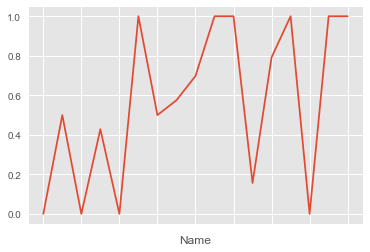

In [53]:
train.groupby(train['Name'].apply(lambda x: x.split(', ')[1]).apply(lambda x: x.split('.')[0]))['Survived'].mean().plot()

In [54]:
##Further feature engineering
#Title
combine['Title'] = combine['Name'].apply(lambda x: x.split(', ')[1]).apply(lambda x: x.split('.')[0])
combine['Title'] = combine['Title'].replace(['Don','Dona', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col','Sir','Dr'],'Mr')
combine['Title'] = combine['Title'].replace(['Mlle','Ms'], 'Miss')
combine['Title'] = combine['Title'].replace(['the Countess','Mme','Lady','Dr'], 'Mrs')
df = pd.get_dummies(combine['Title'],prefix='Title')
combine = pd.concat([combine,df],axis=1)

#Name_length
combine['Name_Len'] = combine['Name'].apply(lambda x: len(x))
combine['Name_Len'] = pd.qcut(combine['Name_Len'],5)


#Dead_female_family & Survive_male_family
combine['Surname'] = combine['Name'].apply(lambda x:x.split(',')[0])
dead_female_surname = list(set(combine[(combine.Sex=='female') & (combine.Age>=12)
                              & (combine.Survived==0) & ((combine.Parch>0) | (combine.SibSp > 0))]['Surname'].values))
survive_male_surname = list(set(combine[(combine.Sex=='male') & (combine.Age>=12)
                              & (combine.Survived==1) & ((combine.Parch>0) | (combine.SibSp > 0))]['Surname'].values))
combine['Dead_female_family'] = np.where(combine['Surname'].isin(dead_female_surname),0,1)
combine['Survive_male_family'] = np.where(combine['Surname'].isin(survive_male_surname),0,1)
combine = combine.drop(['Name','Surname'],axis=1)


#Age & isChild
group = combine.groupby(['Title', 'Pclass'])['Age']
combine['Age'] = group.transform(lambda x: x.fillna(x.median()))
combine = combine.drop('Title',axis=1)
combine['IsChild'] = np.where(combine['Age']<=12,1,0)
combine['Age'] = pd.cut(combine['Age'],5)
combine = combine.drop('Age',axis=1)

#ticket
combine['Ticket_Lett'] = combine['Ticket'].apply(lambda x: str(x)[0])
combine['Ticket_Lett'] = combine['Ticket_Lett'].apply(lambda x: str(x))

combine['High_Survival_Ticket'] = np.where(combine['Ticket_Lett'].isin(['1', '2', 'P']),1,0)
combine['Low_Survival_Ticket'] = np.where(combine['Ticket_Lett'].isin(['A','W','3','7']),1,0)
combine = combine.drop(['Ticket','Ticket_Lett'],axis=1)

#Embarked
#combine = combine.drop('Embarked',axis=1)
combine.Embarked = combine.Embarked.fillna('S')
df = pd.get_dummies(combine['Embarked'],prefix='Embarked')
combine = pd.concat([combine,df],axis=1).drop('Embarked',axis=1)

#FamilySize
combine['FamilySize'] = np.where(combine['SibSp']+combine['Parch']==0, 'Alone',
                                    np.where(combine['SibSp']+combine['Parch']<=3, 'Small', 'Big'))
df = pd.get_dummies(combine['FamilySize'],prefix='FamilySize')
combine = pd.concat([combine,df],axis=1).drop(['SibSp','Parch','FamilySize'],axis=1)


#Cabin
combine['Cabin_isNull'] = np.where(combine['Cabin'].isnull(),0,1)
combine = combine.drop('Cabin',axis=1)

#PClass
df = pd.get_dummies(combine['Pclass'],prefix='Pclass')
combine = pd.concat([combine,df],axis=1).drop('Pclass',axis=1)


#Sex
df = pd.get_dummies(combine['Sex'],prefix='Sex')
combine = pd.concat([combine,df],axis=1).drop('Sex',axis=1)

#Fare
combine['Fare'].fillna(combine['Fare'].dropna().median(),inplace=True)
combine['Low_Fare'] = np.where(combine['Fare']<=8.662,1,0)
combine['High_Fare'] = np.where(combine['Fare']>=26,1,0)
combine = combine.drop('Fare',axis=1)

In [55]:
from sklearn.preprocessing import LabelEncoder
features = combine.drop(["PassengerId","Survived"], axis=1).columns
le = LabelEncoder()
for feature in features:
    le = le.fit(combine[feature])
    combine[feature] = le.transform(combine[feature])

In [56]:
X_all = combine.iloc[:891,:].drop(["PassengerId","Survived"], axis=1)
Y_all = combine.iloc[:891,:]["Survived"]
X_test = combine.iloc[891:,:].drop(["PassengerId","Survived"], axis=1)

X_all.head()


,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Name_Len,Dead_female_family,Survive_male_family,IsChild,High_Survival_Ticket,Low_Survival_Ticket,...,FamilySize_Big,FamilySize_Small,Cabin_isNull,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Low_Fare,High_Fare
0,0,0,1,0,1,1,1,0,0,1,...,0,1,0,0,0,1,0,1,1,0
1,0,0,0,1,4,1,1,0,1,0,...,0,1,1,1,0,0,1,0,0,1
2,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,0,0,0,1,4,1,1,0,1,0,...,0,1,1,1,0,0,1,0,0,1
4,0,0,1,0,2,1,1,0,0,1,...,0,0,0,0,0,1,0,1,1,0


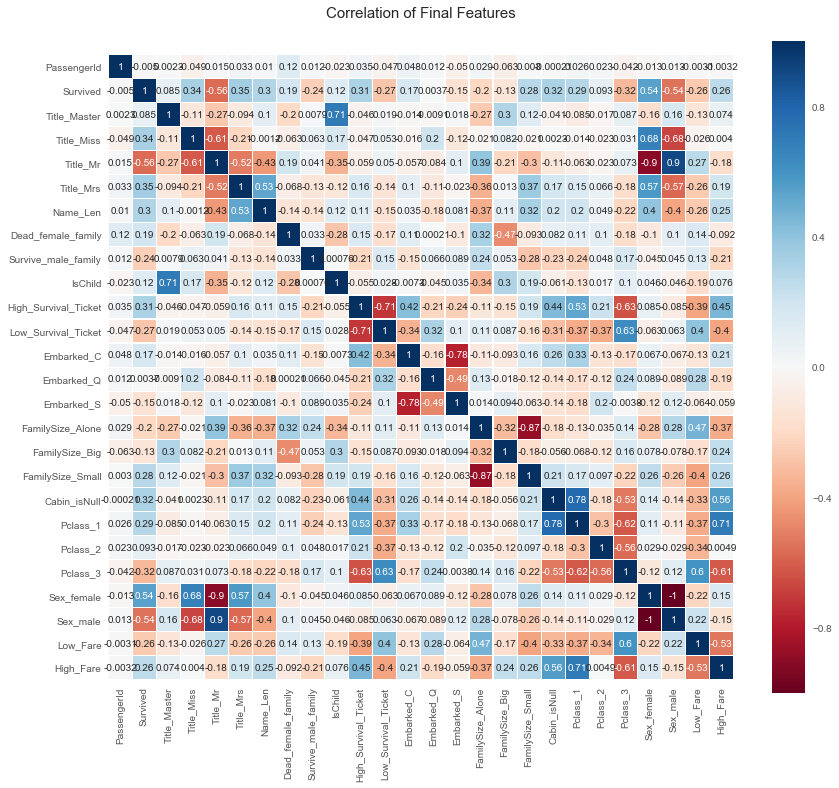

In [57]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Final Features', y=1.05, size=15)
sns.heatmap(combine.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

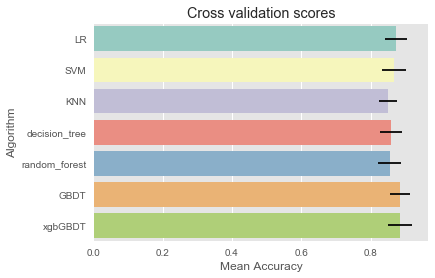

In [129]:
#training
logreg = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors = 3)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=300,min_samples_leaf=4,class_weight={0:0.745,1:0.255})
gbdt = GradientBoostingClassifier(n_estimators=500,learning_rate=0.03,max_depth=3)
xgb = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.03)
clfs = [logreg, svc, knn, decision_tree, random_forest, gbdt, xgb]

kfold = 10
cv_results = []
for classifier in clfs :
    cv_results.append(cross_val_score(classifier, X_all.values, y = Y_all.values, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

ag = ["LR","SVM",'KNN','decision_tree',"random_forest","GBDT","xgbGBDT"]
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":ag})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [130]:
for i in range(7):
    print(ag[i],cv_means[i])


LR 0.8730793893996142
SVM 0.8674489274770174
KNN 0.8506829531267733
decision_tree 0.8584598796958348
random_forest 0.8553404834865509
GBDT 0.8843408807172851
xgbGBDT 0.8854267393031439


In [131]:
from sklearn.metrics import precision_score

class Bagging(object):
    
    def __init__(self,estimators):
        self.estimator_names = []
        self.estimators = []
        for i in estimators:
            self.estimator_names.append(i[0])
            self.estimators.append(i[1])
        self.clf = LogisticRegression()
    
    def fit(self, train_x, train_y):
        for i in self.estimators:
            i.fit(train_x,train_y)
        x = np.array([i.predict(train_x) for i in self.estimators]).T
        y = train_y
        self.clf.fit(x, y)
    
    def predict(self,x):
        x = np.array([i.predict(x) for i in self.estimators]).T
        #print(x)
        return self.clf.predict(x)
        
    
    def score(self,x,y):
        s = precision_score(y,self.predict(x))
        return s

In [132]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=4,class_weight={0:0.745,1:0.255})
gbdt = GradientBoostingClassifier(n_estimators=500,learning_rate=0.03,max_depth=3)
xgbGBDT = XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.03)
clfs = [logreg, svc, knn, decision_tree, random_forest, gbdt, xgb]

bag = Bagging([('xgb',xgb),('lr',lr),('gbdt',gbdt),('rf',rf)])

from sklearn.metrics import precision_score

In [133]:
score = 0
for i in range(0,10):
    num_test = 0.20
    X_train, X_cv, Y_train, Y_cv = train_test_split(X_all.values, Y_all.values, test_size=num_test)
    bag.fit(X_train, Y_train)
    #Y_test = bag.predict(X_test)
    acc_xgb = round(bag.score(X_cv, Y_cv) * 100, 2)
    score+=acc_xgb
score/10

90.018

In [1]:
bag.fit(X_all.values, Y_all.values)
Y_test = bag.predict(X_test.values).astype(int)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_test
    })
submission.to_csv('submission2.csv', index=False)

NameError: name 'bag' is not defined